In [1]:
import numpy as np

\begin{align}
y_1 = 2x_1^2 + 3x_2^2 -7x_3^2 -5x_1 + 11x_2 + 2x_3 + 3
\end{align}


\begin{align}
y_2 = 13x_1^2 - 11x_2^2 +7x_3^2 +2x_1 + 19x_2 - 13x_3 + 5
\end{align}

In [2]:
def generate_data(low = 0.0, high = 1.0, n=100, d=3):
    np.random.seed(73)
    return np.random.uniform(low, high, (n,d))

def quadratic_func(x, sq_coef, li_coef, bias):
    """Outputs a quadratic function with n variables  
    (based on dimension of ndarray and value of coefficients passed). 
    The number of dimensions and the number of coefficients should match"""
    sq_x = np.square(x)
    return sq_x @ sq_coef.T + x @ li_coef.T + bias
    
x = generate_data(-1.0,1.0,300, 3)

y1 = quadratic_func(x, np.array([[2,3,-7]]), np.array([[-5,11,2]]), 3)
y2 = quadratic_func(x, np.array([[13,-11,7]]), np.array([[2,19,-13]]), 5)

In [3]:
print(x.shape)
print(y1.shape)
print(y2.shape)
weights = np.random.randn(3, 3) * np.sqrt(2/3)
print(weights.shape)

(300, 3)
(300, 1)
(300, 1)
(3, 3)


In [4]:
print(y1)

[[ 2.64717173e+00]
 [-1.58401816e+00]
 [ 6.74239645e+00]
 [ 3.30567816e+00]
 [ 1.24066630e+01]
 [-4.84080740e+00]
 [-1.09242151e+01]
 [ 1.68834248e+00]
 [ 2.39381350e+00]
 [ 1.51512446e+01]
 [-2.98838029e+00]
 [ 4.74379126e+00]
 [ 2.63271336e+00]
 [-5.01242543e+00]
 [ 1.21651706e+00]
 [ 3.80655517e+00]
 [-7.61653335e+00]
 [ 6.22602751e-01]
 [ 6.90652537e+00]
 [ 1.16305631e+01]
 [ 3.26272317e+00]
 [ 2.62635366e+00]
 [-3.56310503e+00]
 [-3.30388117e+00]
 [-6.45267601e+00]
 [ 1.39722173e+01]
 [-2.86309987e+00]
 [-2.53552012e+00]
 [-2.21589359e+00]
 [-1.02637913e+01]
 [ 9.78165983e+00]
 [ 6.75410762e-01]
 [-9.14662386e+00]
 [-1.04090491e+01]
 [-5.59271881e+00]
 [-1.54023020e+00]
 [-2.98785517e+00]
 [ 6.98532994e-01]
 [ 2.29311381e+00]
 [ 1.68498457e+01]
 [-5.62670146e+00]
 [ 4.74496257e+00]
 [-1.39964242e+00]
 [ 6.83840776e+00]
 [ 2.57221850e+00]
 [-9.49316077e+00]
 [ 1.56643777e+01]
 [-1.90016710e+00]
 [ 9.34205865e+00]
 [ 1.78001296e+01]
 [-4.71521016e-01]
 [-6.71938896e+00]
 [-6.2729024

In [5]:
print(y2)

[[  7.7260833 ]
 [ 15.51147629]
 [  4.88801436]
 [ -0.1967513 ]
 [ 27.72914239]
 [-11.5937208 ]
 [-12.10287954]
 [-14.06322429]
 [ 17.99080995]
 [  8.94490449]
 [ 33.53164765]
 [  9.61548137]
 [ -3.79253772]
 [-14.39064505]
 [ 29.20914297]
 [  0.14912002]
 [-10.27034874]
 [ -0.40415323]
 [ 10.58354385]
 [ 15.42165146]
 [ 10.33660653]
 [ -2.396526  ]
 [ 26.85126922]
 [ -6.32270698]
 [-15.09039948]
 [ 11.32682367]
 [ 20.37572541]
 [ -3.73353749]
 [ -6.35447059]
 [ 29.18436349]
 [ 12.63796189]
 [ 18.01266368]
 [ 14.94674382]
 [ 35.20923912]
 [ 22.92328486]
 [ 10.97142896]
 [ 14.06979784]
 [ -2.43298237]
 [-11.98744622]
 [ 27.73075452]
 [ 20.23741594]
 [ 19.5754045 ]
 [-21.26929104]
 [  9.832431  ]
 [  1.76379947]
 [ 13.37473091]
 [ 17.18163412]
 [ 19.14500678]
 [  9.1889587 ]
 [ 28.6569017 ]
 [-14.0120373 ]
 [-14.82670039]
 [-11.58235535]
 [ 28.17529672]
 [ 26.04627445]
 [ -1.38287928]
 [ 34.38859543]
 [ -0.45669676]
 [  4.6005949 ]
 [ -0.97415153]
 [ 29.72124976]
 [  1.38620505]
 [  5.40

In [6]:
y_true = np.concatenate((y1,y2), axis=1)
print(y_true.shape)
print(x.shape)

(300, 2)
(300, 3)


In [7]:

def plot_4d(x1,x2,x3,y_true,y_pred=None):
    %matplotlib inline
    %matplotlib notebook

    from matplotlib import cm
    from matplotlib import colors
    from mpl_toolkits import mplot3d
    import matplotlib.pyplot as plt

    plt.rcParams["figure.figsize"] = 17, 10
    ax = plt.axes(projection='3d')
    
    max_y = np.max(y_true)
    min_y = np.min(y_true)
    
    if y_pred is not None:
        mx_pred = np.max(y_pred)
        mn_pred = np.min(y_pred)
        if mx_pred > max_y:
            max_y = mx_pred
        if mn_pred < min_y:
            min_y = mn_pred
    
    cmap = cm.get_cmap('seismic')
    norm = colors.Normalize(vmin=min_y,vmax=max_y)
    print(f'max : {max_y}  min : {min_y}')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('x3')
    sc1 = ax.scatter(x1, x2, x3,s=np.square(y_true[:,0] + 2),c=y_true[:,0] ,norm=norm, cmap=cmap)
    cb1 = plt.colorbar(sc1)
    cb1.set_label('y_true')
    if y_pred is not None:
        cmap2 = cm.get_cmap('PRGn')
        sc2 = ax.scatter(x1, x2, x3,s=np.square(y_pred[:,0] + 2),c=y_pred[:,0] ,norm=norm, cmap=cmap2)
        cb2 = plt.colorbar(sc2)
        cb2.set_label('y_pred')
#     sc = ax.scatter(x[:,0], x[:,1], x[:,2],s=np.square(y1[:,0] + 2),c=y1[:,0] ,norm=norm, cmap=cmap)
    plt.xlabel='x1'
    plt.ylabel='x2'
    plt.zlabel='x3'

<IPython.core.display.Javascript object>


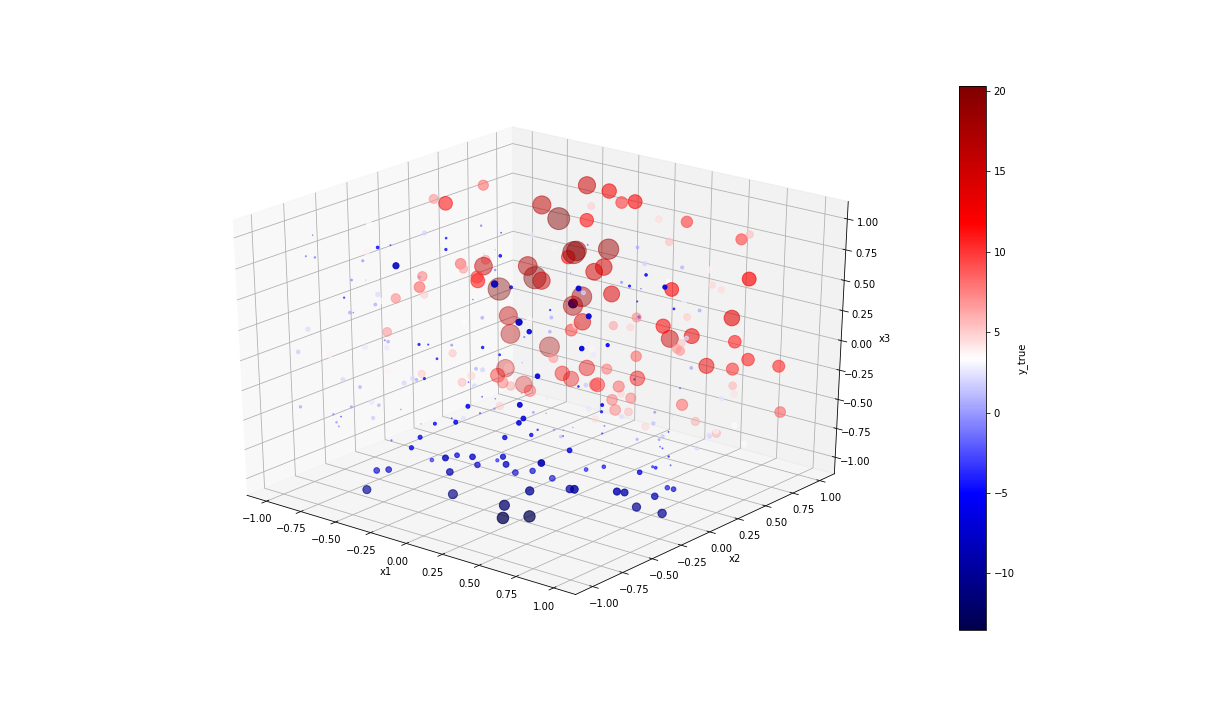

max : 20.284099794015997  min : -13.5285978007839


In [19]:
plot_4d(x[:,0], x[:,1], x[:,2], y1)

<IPython.core.display.Javascript object>


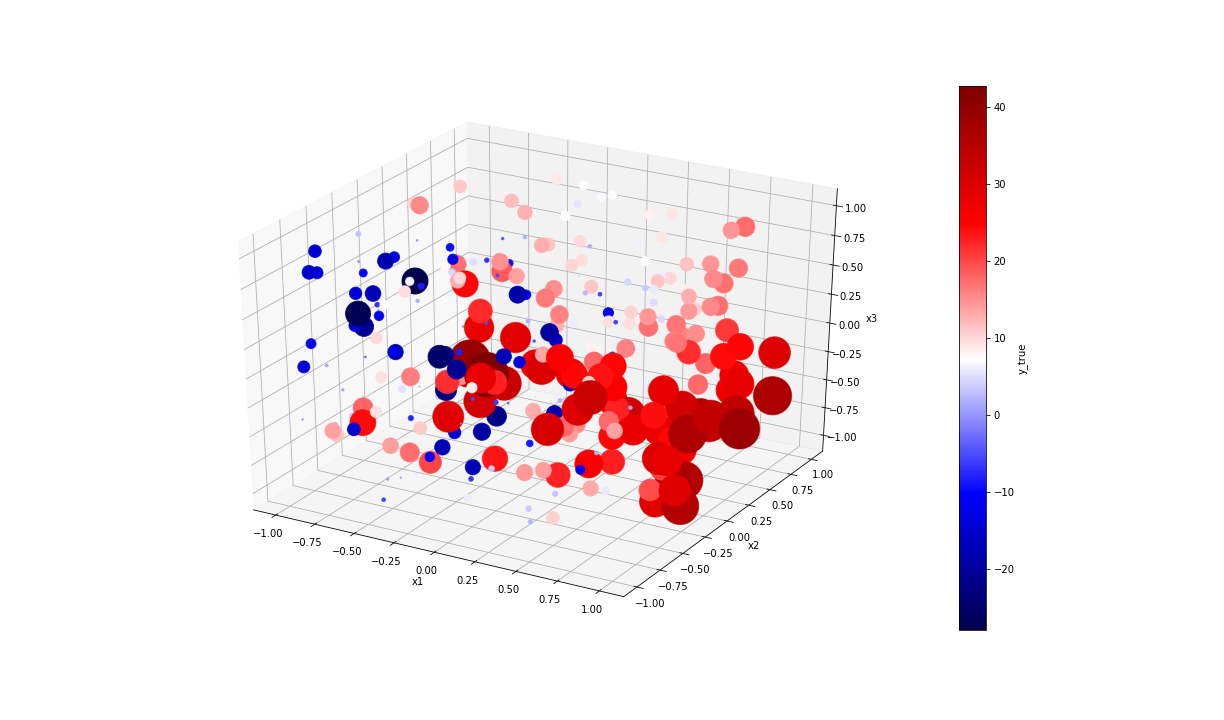

max : 42.6099130903702  min : -27.935697967500786


In [18]:
plot_4d(x[:,0], x[:,1], x[:,2], y2)

In [10]:
# Linear Layer
class Linear:
    def __init__(self, input_dim, num_neurons):
        # Xavier's Initialization of weights
        self.weights = np.random.randn(input_dim, num_neurons) * np.sqrt(2/input_dim)
        self.bias = np.zeros(1)
#         print(f'input_dim {input_dim} num_neurons {num_neurons} self.weights {self.weights.shape}')

    def __call__(self, x):
        self.x = x
#         print(f'x shape : {x.shape}  weights : {weights.shape}')
        output = x @ self.weights + self.bias
#         print(f'Linear layer output shape {output.shape}')
        return output
    
    def backprop_gradient(self, gradient):
        # Here we are computing the gradient with which we need to adjust the weight and bias of this layer
        # using the gradient from the layer after this, and we also compute the x-gradient (the gradient with which
        # the previous layer's output needs to adjust which will get returned)
        
        # y = wx + b
        # x-gradient    dy/dx = w
        # w-gradient    dy/dw = x
        # bias gradient dy/db = 1
        #(300, 3)(3, 3)(300, 1)
        self.w_gradient = self.x.T @ gradient
        self.x_gradient = gradient @ self.weights.T
        self.bias_gradient = gradient.sum()
        return self.x_gradient
    
    def update(self, lr):
        # Updating weights and bias value calculated in backprop function
        self.weights = self.weights - lr * self.w_gradient
        self.bias = self.bias - lr * self.bias_gradient
        
        

class Relu:
    def __call__(self, input):
        self.input = input
        self.output = np.clip(self.input, 0, None)
        return self.output
    
    def backprop_gradient(self, gradient):
        self.input_gradient = (self.input > 0) * gradient
        return self.input_gradient
        
        
class MSE:
    def __call__(self, y_true, y_pred):
        self.y_pred = y_pred
        self.y_true = y_true
        # MSE = (delta_y1^2/n + delta_y2^2/n + ...delta_yn^2/n)
        return ((self.y_pred - self.y_true)**2).mean()
    
    def backprop_gradient(self):
        # At this level we want to find out what effect the predicted value has on the cost function,
        #or in other words how much sensitive a cost function is to small change in predicted output,
        # which translates mathematically as finding the derivative of cost function with respect to predicted output
        n = self.y_true.shape[0]
        #derivative of MSE wrt output delta_y = 2*(delta_y1 + delta_y2 + ...)/n
        self.gradient = 2 * (self.y_pred - self.y_true)/n
#         print(f'MSE Backward_Gradient ==> Y_shape {self.y_pred.shape} gradient_shape {self.gradient.shape}')
        return self.gradient
        
class Model:
    def __init__(self, input_dim):
        self.linear_ip = Linear(input_dim, 5)
        self.relu1   = Relu()
        self.linear2 = Linear(5, 4)
        self.relu2   = Relu()
        self.linear_op = Linear(4, 2)
        
    def __call__(self,x):
        l1 = self.linear_ip(x)
#         print(f'l1 shape : {l1.shape}')
        r1 = self.relu1(l1)
#         print(f'r1 shape : {r1.shape}')
        l2 = self.linear2(r1)
#         print(f'l2 shape : {l2.shape}')
        r2 = self.relu2(l2)
        l3 = self.linear_op(r2)
        return l3
    
    def backward(self, op_gradient):
        l3_grad = self.linear_op.backprop_gradient(op_gradient)
        r2_grad = self.relu2.backprop_gradient(l3_grad)
        l2_grad = self.linear2.backprop_gradient(r2_grad)
        r1_grad = self.relu1.backprop_gradient(l2_grad)
        l1_grad = self.linear_ip.backprop_gradient(r1_grad)
        return l1_grad
    
    def update(self, lr):
        self.linear_op.update(lr)
        self.linear2.update(lr)
        self.linear_ip.update(lr)

In [11]:
def fit(x, y_true, model, loss, lr=0.01, num_epoch=1000):
    
    for epoch in range(num_epoch):
        y_pred = model(x)
        loss_val = loss(y_true, y_pred)
        print(f'Epoch {epoch}, loss {loss_val}')
        model.backward(loss.backprop_gradient())
        model.update(lr)

In [12]:
loss = MSE()
model = Model(x.shape[1])
fit(x, y_true, model, loss)

Epoch 0, loss 177.33612305519995
Epoch 1, loss 173.52610324977096
Epoch 2, loss 168.88687319825868
Epoch 3, loss 162.05522360316692
Epoch 4, loss 150.71770940707154
Epoch 5, loss 130.12970755714073
Epoch 6, loss 94.53176855801118
Epoch 7, loss 61.32493432113339
Epoch 8, loss 49.819195868475155
Epoch 9, loss 43.84121961539237
Epoch 10, loss 40.77768264406597
Epoch 11, loss 41.809373023161385
Epoch 12, loss 60.08591416103857
Epoch 13, loss 65.6612837246556
Epoch 14, loss 102.72092270474167
Epoch 15, loss 57.1453908055785
Epoch 16, loss 46.72978170350021
Epoch 17, loss 45.37331352288332
Epoch 18, loss 42.51332499584278
Epoch 19, loss 41.57049993015175
Epoch 20, loss 39.81613522649744
Epoch 21, loss 44.252281914600715
Epoch 22, loss 40.370474105056644
Epoch 23, loss 51.167372526482104
Epoch 24, loss 37.802504222566874
Epoch 25, loss 44.852162785911645
Epoch 26, loss 37.791650074011194
Epoch 27, loss 46.78494345616654
Epoch 28, loss 35.78165816843814
Epoch 29, loss 42.396312971297306
Epoch 

Epoch 275, loss 9.719422462471222
Epoch 276, loss 7.205783619892918
Epoch 277, loss 9.846423882267606
Epoch 278, loss 7.1896347113717125
Epoch 279, loss 9.761519763532927
Epoch 280, loss 7.053105140664529
Epoch 281, loss 9.520233581950361
Epoch 282, loss 6.878341223177444
Epoch 283, loss 9.293091757886582
Epoch 284, loss 6.793404470015275
Epoch 285, loss 9.135598613176224
Epoch 286, loss 6.709860735220303
Epoch 287, loss 9.006448200463003
Epoch 288, loss 6.634624697088693
Epoch 289, loss 8.849435412297934
Epoch 290, loss 6.531549247815665
Epoch 291, loss 8.670211649905559
Epoch 292, loss 6.4686531667715474
Epoch 293, loss 8.571469730693492
Epoch 294, loss 6.447982247268564
Epoch 295, loss 8.523458021298856
Epoch 296, loss 6.347797925991508
Epoch 297, loss 8.357112048456484
Epoch 298, loss 6.262834449854936
Epoch 299, loss 8.246384786736325
Epoch 300, loss 6.243453410761396
Epoch 301, loss 8.227408059046626
Epoch 302, loss 6.139436628322511
Epoch 303, loss 8.077125832760045
Epoch 304, l

Epoch 639, loss 5.553845357342477
Epoch 640, loss 4.339327006977354
Epoch 641, loss 5.563549088390826
Epoch 642, loss 4.347933814347444
Epoch 643, loss 5.580720084683308
Epoch 644, loss 4.360167955377696
Epoch 645, loss 5.604412292545576
Epoch 646, loss 4.370807120333597
Epoch 647, loss 5.624901046872507
Epoch 648, loss 4.375319579664409
Epoch 649, loss 5.635099043511169
Epoch 650, loss 4.383538176276878
Epoch 651, loss 5.650511420693904
Epoch 652, loss 4.385139479900319
Epoch 653, loss 5.655091414249457
Epoch 654, loss 4.390611911326347
Epoch 655, loss 5.6677984857486186
Epoch 656, loss 4.391423574915029
Epoch 657, loss 5.669400004960552
Epoch 658, loss 4.392513674932703
Epoch 659, loss 5.6723612287127665
Epoch 660, loss 4.407172658867893
Epoch 661, loss 5.700137484090278
Epoch 662, loss 4.422931145205057
Epoch 663, loss 5.728758768166826
Epoch 664, loss 4.429778491730914
Epoch 665, loss 5.742369429767259
Epoch 666, loss 4.43851665784526
Epoch 667, loss 5.75860589607196
Epoch 668, los

Epoch 987, loss 5.5364446294459375
Epoch 988, loss 4.247209499815343
Epoch 989, loss 5.543481568046276
Epoch 990, loss 4.249834300422699
Epoch 991, loss 5.547548947253496
Epoch 992, loss 4.246732812776457
Epoch 993, loss 5.5428551390265985
Epoch 994, loss 4.249196666463319
Epoch 995, loss 5.547015121871926
Epoch 996, loss 4.245694718958728
Epoch 997, loss 5.538466135900437
Epoch 998, loss 4.245749802075758
Epoch 999, loss 5.540628983081776


In [13]:
y_pred = model(x)
y_pred.shape

(300, 2)

In [14]:
y1_pred = y_pred[:,0].reshape(300,1)
y2_pred = y_pred[:,1].reshape(300,1)

<IPython.core.display.Javascript object>


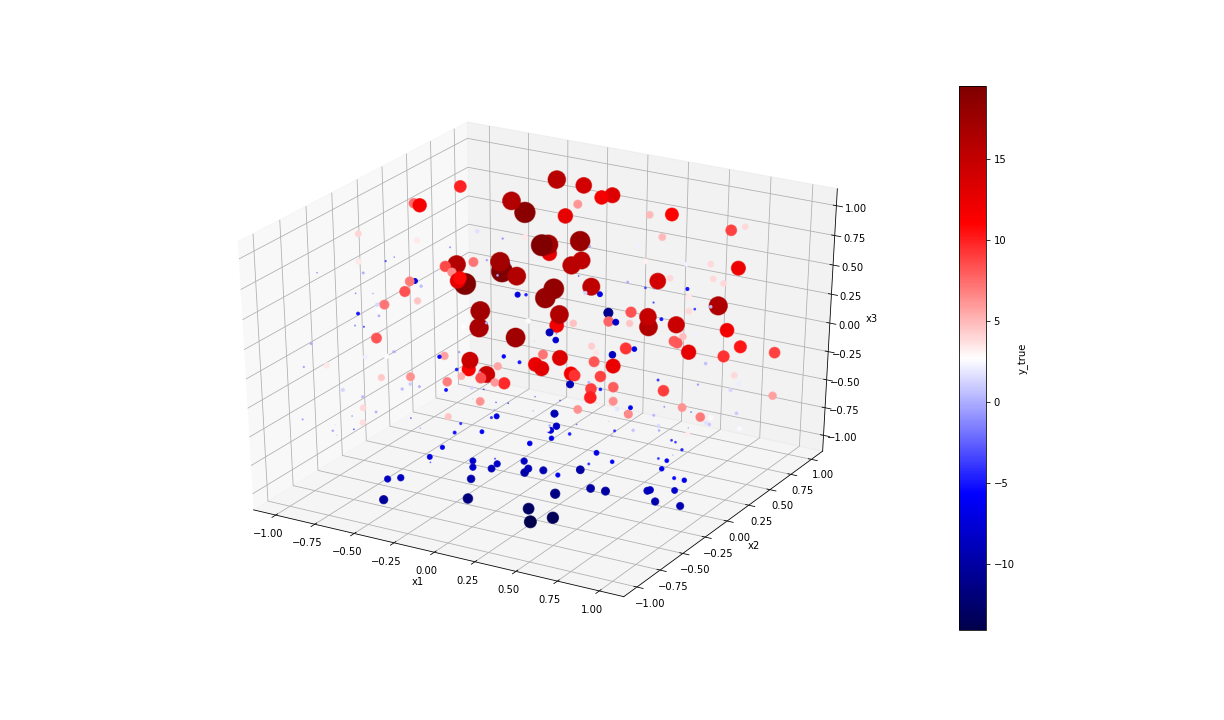

max : 19.459995378333478  min : -14.046680597660846


In [17]:
plot_4d(x[:,0], x[:,1], x[:,2], y1_pred)

<IPython.core.display.Javascript object>


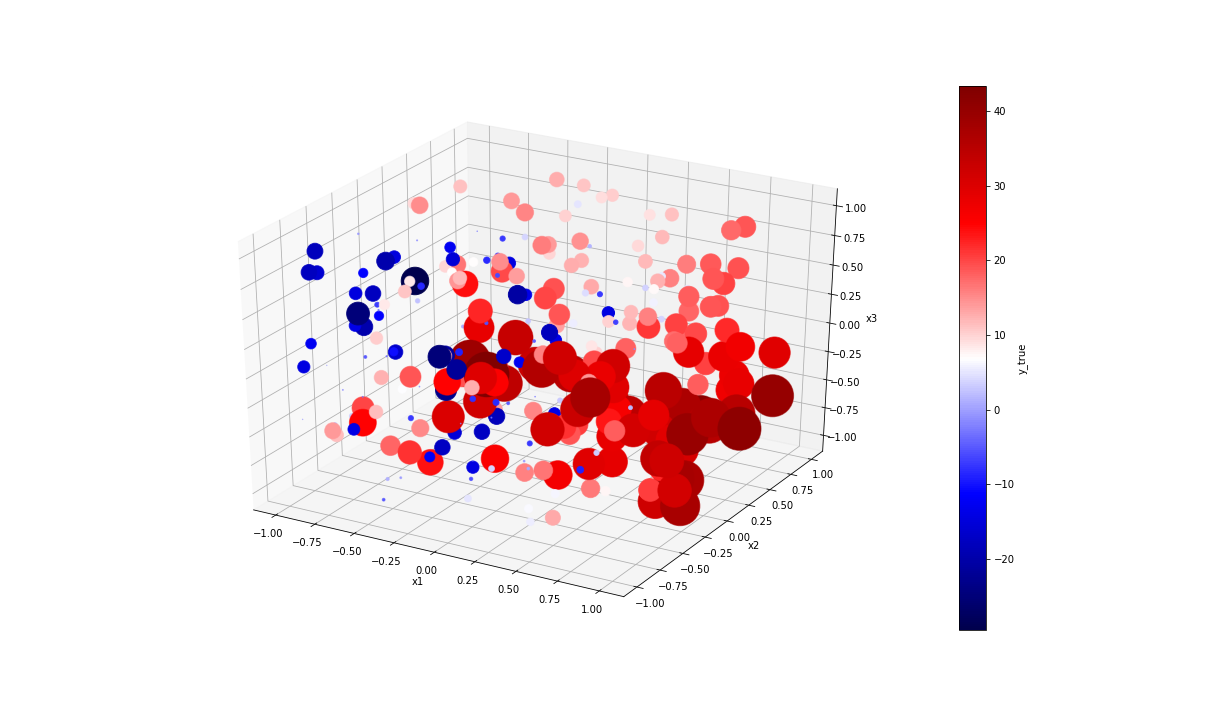

max : 43.282468764024486  min : -29.486523944781354


In [16]:
plot_4d(x[:,0], x[:,1], x[:,2], y2_pred)